In [70]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [71]:
df = pd.read_csv('../movies_metadata.csv')

C:\Users\Tasli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
df.shape

(45466, 24)

In [73]:
#Lets drop duplicates 
df.drop_duplicates(inplace=True)
df.shape

(45453, 24)

In [74]:
#Lets see if there are any null values
df.isnull().sum()
#we first want to remove the un-used columns then remove null values

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [75]:
#Remove un-used colmns
df.drop(columns=['id','adult','belongs_to_collection','genres','homepage','imdb_id','original_language','original_title','overview','poster_path','production_companies','production_countries','release_date','revenue','spoken_languages','status','tagline','video'], inplace =True)

In [76]:
df.shape

(45453, 6)

In [77]:
#Since we need these remaining columns, lets see null and remove them
print(df.isnull().sum())

df.dropna(inplace=True)
print(df.shape)

budget            0
popularity        5
runtime         263
title             6
vote_average      6
vote_count        6
dtype: int64
(45190, 6)


In [78]:
#lets see the types of data stored in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45190 entries, 0 to 45465
Data columns (total 6 columns):
budget          45190 non-null object
popularity      45190 non-null object
runtime         45190 non-null float64
title           45190 non-null object
vote_average    45190 non-null float64
vote_count      45190 non-null float64
dtypes: float64(3), object(3)
memory usage: 2.4+ MB


In [79]:
df.head(2)

,budget,popularity,runtime,title,vote_average,vote_count
0,30000000,21.9469,81.0,Toy Story,7.7,5415.0
1,65000000,17.0155,104.0,Jumanji,6.9,2413.0


In [80]:
#The budget and popularity are not numeric. Lets convert them
df['budget'] = pd.to_numeric(df['budget'],errors='coerce')
#lets see the type and also the null values after converting
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45190 entries, 0 to 45465
Data columns (total 6 columns):
budget          45190 non-null int64
popularity      45190 non-null object
runtime         45190 non-null float64
title           45190 non-null object
vote_average    45190 non-null float64
vote_count      45190 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.4+ MB
None


budget          0
popularity      0
runtime         0
title           0
vote_average    0
vote_count      0
dtype: int64

In [81]:
#lets do the same for popularity

#The popularity is not numeric. Lets convert 
df['popularity'] = pd.to_numeric(df['popularity'],errors='coerce')
#lets see the type and info about popularity
df['popularity'].describe()

count    45190.000000
mean         2.936888
std          6.019567
min          0.000000
25%          0.394017
50%          1.135799
75%          3.720080
max        547.488298
Name: popularity, dtype: float64

<h1> Clean up data by removing 0 values and process Json <h1>

In [82]:
df.title.describe()

count          45190
unique         42027
top       Cinderella
freq              11
Name: title, dtype: object

In [83]:
#lets remove the titles which are repeated and then remove title column

df.drop_duplicates('title',keep='last',inplace=True)
df.drop(columns=['title'],inplace=True)
df.shape

(42027, 5)

(42027, 5)


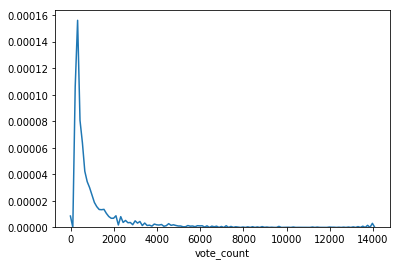

In [84]:
#Lets start by checking vote count - we dont use this column but we need to make sure all movies have been voted

sns.distplot(df['vote_count'],hist=False)
print(df.shape)

In [85]:
#A lot of 0s it seems, remove them and then drop the column

index_zero_vote= df[df['vote_count'] ==0].index
df.drop(index_zero_vote,axis=0,inplace=True) #Axis = 0 -> Rows

#drop column coz we dont need anymore
df.drop(columns=['vote_count'],inplace=True)
print(df.shape)

(39326, 4)


In [86]:
#Lets do the same for budget

index_zero_budget= df[df['budget'] ==0].index
df.drop(index_zero_budget,axis=0,inplace=True)
print(df.shape)

(7934, 4)


In [87]:
#Same for run time
index_zero_runtime = df[df['runtime'] ==0].index

df.drop(index_zero_runtime,axis=0,inplace=True)
print(df.shape)

(7883, 4)


In [88]:
#Same for vote_Average
index_zero_vote_avg = df[df['vote_average'] ==0].index
df.drop(index_zero_vote_avg,axis=0,inplace=True)
print(df.shape)

(7878, 4)


In [89]:
#same for popularity
index_zero_pop = df[df['popularity'] ==0].index
df.drop(index_zero_pop,axis=0,inplace=True)
print(df.shape)


(7878, 4)


In [90]:
#lets see what we have left
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 45422
Data columns (total 4 columns):
budget          7878 non-null int64
popularity      7878 non-null float64
runtime         7878 non-null float64
vote_average    7878 non-null float64
dtypes: float64(3), int64(1)
memory usage: 307.7 KB


<h2> Categorizing Rating <h2>

In [91]:
#lets make 4 final label classes based on the vote average

def categorize_success(rating):
    if rating >= 7.5:
        return 'Very_Good'
    if rating >= 5:
        return 'Average'
    if rating >= 2.5:
        return 'Bad'
    if rating>=0:
        return 'Very_Bad'
    
df["rating_label"] = df["vote_average"].apply(categorize_success)

df.head(3)

,budget,popularity,runtime,vote_average,rating_label
0,30000000,21.946943,81.0,7.7,Very_Good
1,65000000,17.015539,104.0,6.9,Average
3,16000000,3.859495,127.0,6.1,Average


In [92]:
#lets see the values
df['rating_label'].value_counts()

Average      6215
Bad          1002
Very_Good     621
Very_Bad       40
Name: rating_label, dtype: int64

In [93]:
#Doing the slit on selected range is ineffective, lets decide range baed on quartiles

def split_on_quartiles(dfname ,column_name,new_column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'High', 'Very_High'] 
# Creates budget_levels colums
    dfname[new_column_name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname


In [94]:
#df = split_on_quartiles(df,'vote_average','rating_label_quartile')
#df['rating_label_quartile'].value_counts()
df["rating_label_quartile"] = df["vote_average"].apply(categorize_success)



In [95]:
#Lets now drop the vote average and rating_label because we have the labels
df.drop(columns=['vote_average'],inplace=True)

df.drop(columns=['rating_label'],inplace=True)

<h2> Prepare Data for ML models <h2>

In [96]:
#Rearrange df columns

In [97]:
#lets get the numeric values (can normalize them later)

df2 = df[['budget','popularity','runtime']]

df2 = (df2-df2.min())/(df2.max()-df2.min())

df2.insert(len(df2.columns),'rating_label_quartile',df[['rating_label_quartile']])

df2.head(2)

,budget,popularity,runtime,rating_label_quartile
0,0.078947,0.040087,0.109843,Very_Good
1,0.171053,0.031079,0.142653,Average


In [98]:
#Rearrange df columns to match format
cols = ['budget','popularity','runtime','rating_label_quartile']
df = df[cols]
df.head(2)

,budget,popularity,runtime,rating_label_quartile
0,30000000,21.946943,81.0,Very_Good
1,65000000,17.015539,104.0,Average


In [99]:
df2.head(2)

,budget,popularity,runtime,rating_label_quartile
0,0.078947,0.040087,0.109843,Very_Good
1,0.171053,0.031079,0.142653,Average


In [100]:
#Saving the normal (not normalized) into numpy array and then pickle out

arr = np.array(df)
X = arr[:,0:-1]
Y= arr[:,-1]

np.save('data_array_non_formatted_no_genres',arr)

In [101]:
#Saving the  normalized data into numpy array and then pickle out

arr_f = np.array(df2)

np.save('data_array_formatted_no_genres',arr_f)

In [102]:
df2.shape

(7878, 4)

In [103]:
df.shape

(7878, 4)

In [69]:
df2.isnull().sum()

budget                   0
popularity               0
runtime                  0
rating_label_quartile    0
dtype: int64